In [39]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.time_series_preprocessing import (
    extract_currency_series,
    rename_columns_and_set_id,
    convert_column_to_datetime,
    convert_column_to_float,
    drop_over_limit_date,
    export_to_parquet
)

from scripts.time_series_visualization import (
    plot_raw_series,
    plot_series_acf,
    plot_series_pacf,
    checks_stationarity
)

In [40]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [41]:
df_cafe_arabica = pd.read_csv("../data/raw/cafe/INDICADOR DO CAFÉ ARÁBICA CEPEA-ESALQ.csv")
df_cafe_robusta = pd.read_csv("../data/raw/cafe/INDICADOR DO CAFÉ ROBUSTA CEPEA-ESALQ.csv")

In [42]:
df_cafe_arabica.head()

,Data,À vista R$,À vista US$
0,02/09/1996,"123,09","121,15"
1,03/09/1996,"119,68","117,69"
2,04/09/1996,"119,39","117,44"
3,05/09/1996,"118,42","116,38"
4,06/09/1996,"118,09","115,98"


In [43]:
df_cafe_robusta.head()

,Data,À vista R$,À vista US$
0,06/06/2001,0,0
1,07/06/2001,0,0
2,08/06/2001,0,0
3,11/06/2001,0,0
4,12/06/2001,0,0


## Indicador do Café Arábica CEPEA-ESALQ

In [44]:
df_cafe_arabica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7139 entries, 0 to 7138
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         7139 non-null   object
 1   À vista R$   7139 non-null   object
 2   À vista US$  7139 non-null   object
dtypes: object(3)
memory usage: 167.4+ KB


In [45]:
df_cafe_arabica_br = extract_currency_series(df_cafe_arabica)
df_cafe_arabica_br.head()

,Data,À vista R$
0,02/09/1996,"123,09"
1,03/09/1996,"119,68"
2,04/09/1996,"119,39"
3,05/09/1996,"118,42"
4,06/09/1996,"118,09"


In [46]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_cafe_arabica_br = rename_columns_and_set_id(df_cafe_arabica_br, cols_dict_brl, "CAFE_ARABICA")
df_cafe_arabica_br = convert_column_to_datetime(df_cafe_arabica_br, "ds")
df_cafe_arabica_br = convert_column_to_float(df_cafe_arabica_br, "y")

df_cafe_arabica_br.head()

,ds,y,unique_id
0,1996-09-02,123.09,CAFE_ARABICA
1,1996-09-03,119.68,CAFE_ARABICA
2,1996-09-04,119.39,CAFE_ARABICA
3,1996-09-05,118.42,CAFE_ARABICA
4,1996-09-06,118.09,CAFE_ARABICA


In [47]:
df_cafe_arabica_br.tail()

,ds,y,unique_id
7134,2025-04-30,2616.02,CAFE_ARABICA
7135,2025-05-02,2588.62,CAFE_ARABICA
7136,2025-05-05,2580.32,CAFE_ARABICA
7137,2025-05-06,2589.71,CAFE_ARABICA
7138,2025-05-07,2582.77,CAFE_ARABICA


In [48]:
df_cafe_arabica_br = drop_over_limit_date(df_cafe_arabica_br, '01/05/2025', "ds")
df_cafe_arabica_br.tail()

,ds,y,unique_id
7130,2025-04-24,2593.24,CAFE_ARABICA
7131,2025-04-25,2611.02,CAFE_ARABICA
7132,2025-04-28,2658.07,CAFE_ARABICA
7133,2025-04-29,2665.07,CAFE_ARABICA
7134,2025-04-30,2616.02,CAFE_ARABICA


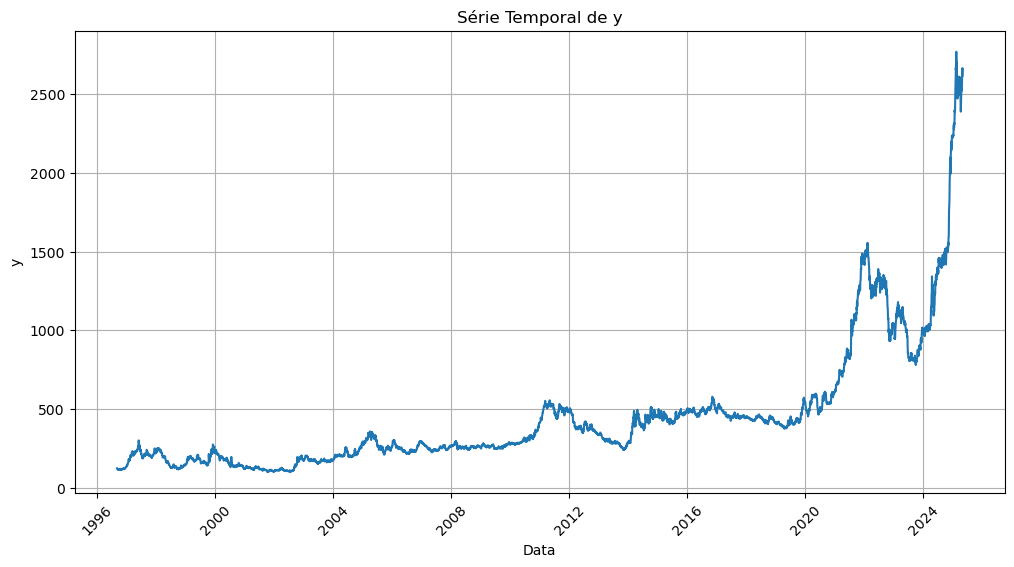

In [49]:
plot_raw_series(df_cafe_arabica_br, "y")

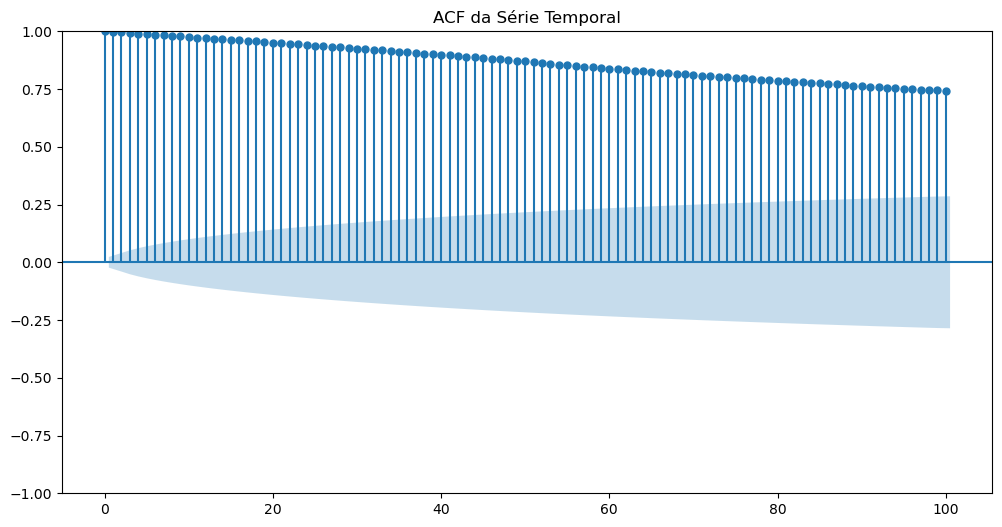

In [50]:
plot_series_acf(df_cafe_arabica_br['y'])

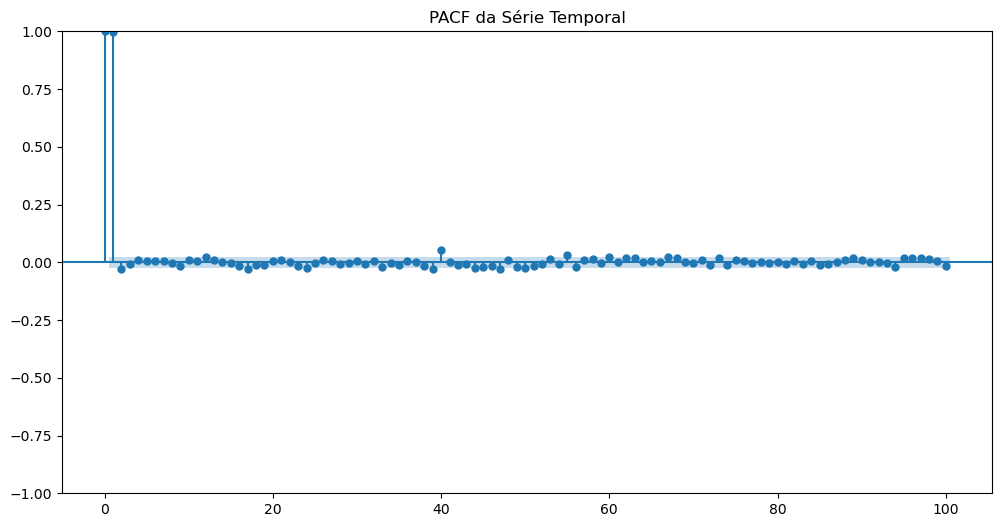

In [51]:
plot_series_pacf(df_cafe_arabica_br['y'])

In [52]:
checks_stationarity(df_cafe_arabica_br['y'])

ADF Statistic: 3.0249852283752547
p-value: 1.0
Críticos: {'1%': np.float64(-3.431271491214899), '5%': np.float64(-2.86194722597782), '10%': np.float64(-2.5669867623171623)}
❌ Série não é estacionária.


In [53]:
export_to_parquet(df_cafe_arabica_br, "../data/cafe/cafe_arabica_brl.parquet")

Arquivo salvo em: ../data/cafe/cafe_arabica_brl.parquet


## Indicador do Café Robusta CEPEA-ESALQ

In [54]:
df_cafe_robusta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5911 entries, 0 to 5910
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5911 non-null   object
 1   À vista R$   5911 non-null   object
 2   À vista US$  5911 non-null   object
dtypes: object(3)
memory usage: 138.7+ KB


In [55]:
df_cafe_robusta_br = extract_currency_series(df_cafe_robusta)
df_cafe_robusta_br.head()

,Data,À vista R$
0,06/06/2001,0
1,07/06/2001,0
2,08/06/2001,0
3,11/06/2001,0
4,12/06/2001,0


In [56]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_cafe_robusta_br = rename_columns_and_set_id(df_cafe_robusta_br, cols_dict_brl, "CAFE_ROBUSTA")
df_cafe_robusta_br = convert_column_to_datetime(df_cafe_robusta_br, "ds")
df_cafe_robusta_br = convert_column_to_float(df_cafe_robusta_br, "y")

df_cafe_robusta_br.head()

,ds,y,unique_id
0,2001-06-06,0.0,CAFE_ROBUSTA
1,2001-06-07,0.0,CAFE_ROBUSTA
2,2001-06-08,0.0,CAFE_ROBUSTA
3,2001-06-11,0.0,CAFE_ROBUSTA
4,2001-06-12,0.0,CAFE_ROBUSTA


In [57]:
df_cafe_robusta_br.tail()

,ds,y,unique_id
5906,2025-04-30,1702.68,CAFE_ROBUSTA
5907,2025-05-02,1667.99,CAFE_ROBUSTA
5908,2025-05-05,1658.00,CAFE_ROBUSTA
5909,2025-05-06,1659.82,CAFE_ROBUSTA
5910,2025-05-07,1657.36,CAFE_ROBUSTA


In [58]:
df_cafe_robusta_br = drop_over_limit_date(df_cafe_robusta_br, '01/05/2025', "ds")
df_cafe_robusta_br.tail()

,ds,y,unique_id
5902,2025-04-24,1698.85,CAFE_ROBUSTA
5903,2025-04-25,1716.34,CAFE_ROBUSTA
5904,2025-04-28,1714.84,CAFE_ROBUSTA
5905,2025-04-29,1714.79,CAFE_ROBUSTA
5906,2025-04-30,1702.68,CAFE_ROBUSTA


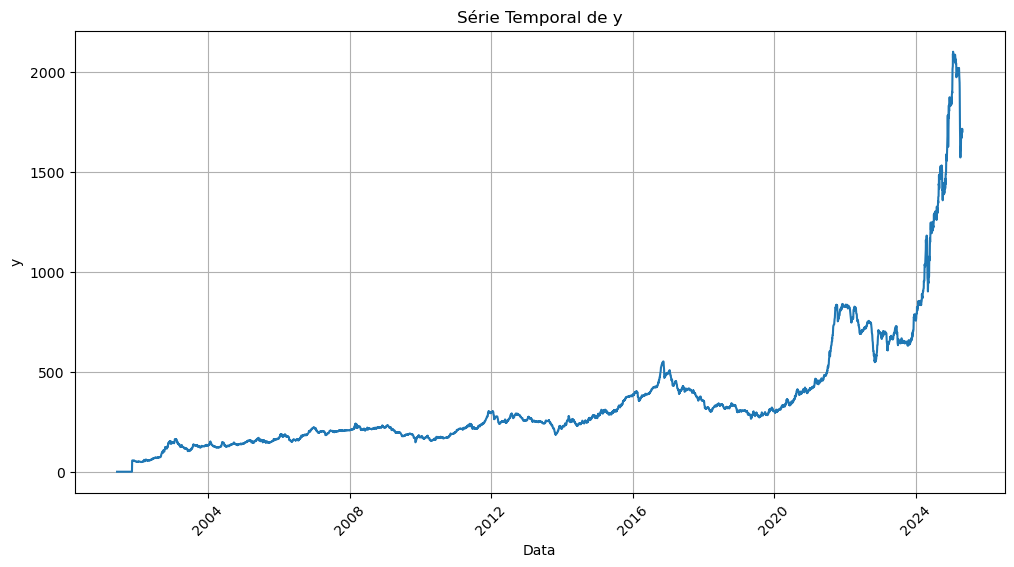

In [59]:
plot_raw_series(df_cafe_robusta_br, "y")

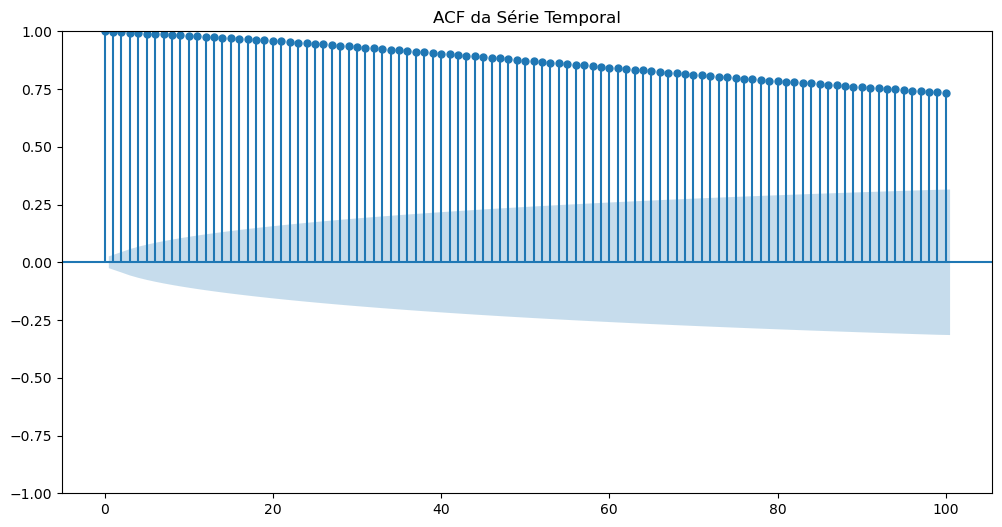

In [60]:
plot_series_acf(df_cafe_robusta_br['y'])

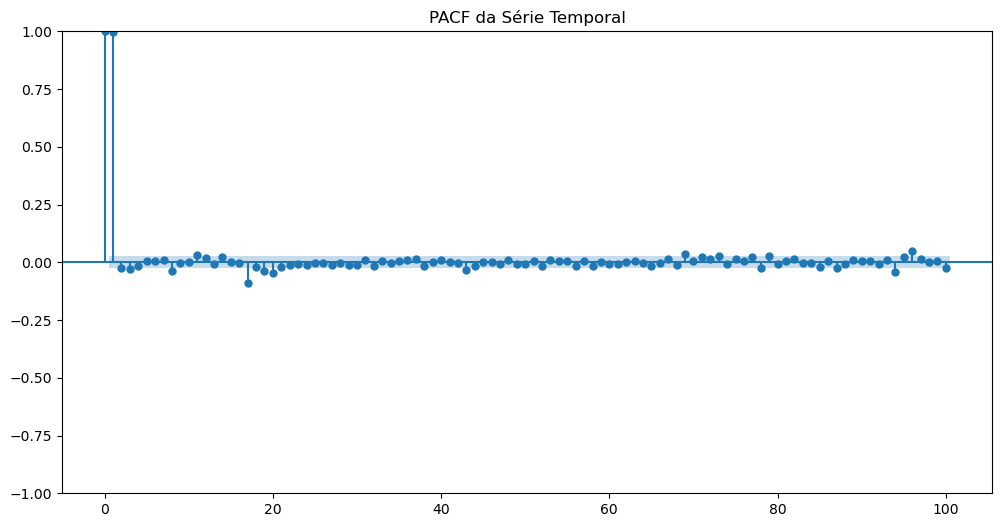

In [61]:
plot_series_pacf(df_cafe_robusta_br['y'])

In [62]:
checks_stationarity(df_cafe_robusta_br['y'])

ADF Statistic: 1.796087053721905
p-value: 0.99834122468819
Críticos: {'1%': np.float64(-3.431464128228021), '5%': np.float64(-2.8620323402946677), '10%': np.float64(-2.5670320705674277)}
❌ Série não é estacionária.


In [63]:
export_to_parquet(df_cafe_robusta_br, "../data/cafe/cafe_robusta_brl.parquet")

Arquivo salvo em: ../data/cafe/cafe_robusta_brl.parquet
